In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [2]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH15-React-Agent")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH15-React-Agent


## React Agent

In [4]:
%%capture
!pip install -U langchain-teddynote

In [23]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.tools.tavily import TavilySearch
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

# 메모리 설정
memory = MemorySaver()
# id = 1

# 모델 설정
model = ChatOpenAI(model_name="gpt-4o-mini")

## 도구 설정

### 웹 검색


In [24]:
from langchain_teddynote.tools.tavily import TavilySearch


web_search = TavilySearch(
    topic="general",  # 뉴스 주제 (general 또는 news)
    # days=1
    include_domains=["google.com"],
    max_results=5,  # 최대 검색 결과
    include_answer=False,
    include_raw_content=False,
    include_images=False,
    format_output=False,  # 결과 포맷팅
)

web_search.name = "web_search"
web_search.description = (
    "Use this tool to search on the web for any topic other than news."
)

In [25]:
result = web_search.search("AI 관련된 최신 뉴스를 검색해줘")
result

[{'title': 'AI와 Google Workspace의 새로운 시대',
  'url': 'https://workspace.google.com/blog/ko/product-announcements/product-announcementsgenerative-ai',
  'content': 'AI와 Google Workspace의 새로운 시대 | Google Workspace 블로그 Google Workspace의 생산성 제품군 전반에서 AI의 발전은 이미 30억 명의 사용자가 스마트 편지쓰기와 스마트 답장을 통해 더 많은 시간을 절약하도록 도와주고 있습니다. Workspace의 다음 여정에 올라 새로운 생성형 AI 경험을 대중에게 공개하기에 앞서 신뢰할 수 있는 테스터들에게 연중 수시로 제공할 계획입니다. 생성형 AI 기능을 사용하면 다음을 수행할 수 있습니다. 공동작업 AI 파트너가 작성해준 글을 다듬고 수정해 사용할 수 있으며, 필요에 따라 더 많은 제안을 받을 수도 있습니다. Product Announcements ### 모든 규모의 비즈니스를 위한 새로운 생성형 AI 및 보안 혁신 기능 출시 작성자: Aparna Pappu • 전문 길이: 6분 Product Announcements ### Google Workspace가 새로운 클라이언트 측 암호화 파트너를 통해 다양한 옵션을 제공합니다 작성자: Johney Burke • 전문 길이: 3분',
  'score': 0.81257004,
  'raw_content': None},
 {'title': 'The Prompt: 생성형 AI 플랫폼의 5가지 핵심 요소 + 경영진이 기존 혁신 기술과 비교 평가한 생성형 AI',
  'url': 'https://cloud.google.com/blog/transform/ko/prompt-5-generative-ai-platform-pillars-execs-compare-generative-ai-past-disruptions',
  'content': "The Promp

In [26]:
result = web_search.invoke("AI 관련된 최신 뉴스를 검색해줘")
result

'[{"title": "AI와 Google Workspace의 새로운 시대", "url": "https://workspace.google.com/blog/ko/product-announcements/product-announcementsgenerative-ai", "content": "AI와 Google Workspace의 새로운 시대 | Google Workspace 블로그 Google Workspace의 생산성 제품군 전반에서 AI의 발전은 이미 30억 명의 사용자가 스마트 편지쓰기와 스마트 답장을 통해 더 많은 시간을 절약하도록 도와주고 있습니다. Workspace의 다음 여정에 올라 새로운 생성형 AI 경험을 대중에게 공개하기에 앞서 신뢰할 수 있는 테스터들에게 연중 수시로 제공할 계획입니다. 생성형 AI 기능을 사용하면 다음을 수행할 수 있습니다. 공동작업 AI 파트너가 작성해준 글을 다듬고 수정해 사용할 수 있으며, 필요에 따라 더 많은 제안을 받을 수도 있습니다. Product Announcements ### 모든 규모의 비즈니스를 위한 새로운 생성형 AI 및 보안 혁신 기능 출시 작성자: Aparna Pappu • 전문 길이: 6분 Product Announcements ### Google Workspace가 새로운 클라이언트 측 암호화 파트너를 통해 다양한 옵션을 제공합니다 작성자: Johney Burke • 전문 길이: 3분", "score": 0.81257004, "raw_content": null}, {"title": "The Prompt: 생성형 AI 플랫폼의 5가지 핵심 요소 + 경영진이 기존 혁신 기술과 비교 평가한 생성형 AI", "url": "https://cloud.google.com/blog/transform/ko/prompt-5-generative-ai-platform-pillars-execs-compare-generative-ai-past-disruptions", "content": "The Prompt: ìƒ�ì„±í˜•

In [27]:
import json

search_result = json.loads(result)

for item in search_result:
    print(item["title"])
    print(item["url"])
    print(item["content"])
    print(item["score"])

AI와 Google Workspace의 새로운 시대
https://workspace.google.com/blog/ko/product-announcements/product-announcementsgenerative-ai
AI와 Google Workspace의 새로운 시대 | Google Workspace 블로그 Google Workspace의 생산성 제품군 전반에서 AI의 발전은 이미 30억 명의 사용자가 스마트 편지쓰기와 스마트 답장을 통해 더 많은 시간을 절약하도록 도와주고 있습니다. Workspace의 다음 여정에 올라 새로운 생성형 AI 경험을 대중에게 공개하기에 앞서 신뢰할 수 있는 테스터들에게 연중 수시로 제공할 계획입니다. 생성형 AI 기능을 사용하면 다음을 수행할 수 있습니다. 공동작업 AI 파트너가 작성해준 글을 다듬고 수정해 사용할 수 있으며, 필요에 따라 더 많은 제안을 받을 수도 있습니다. Product Announcements ### 모든 규모의 비즈니스를 위한 새로운 생성형 AI 및 보안 혁신 기능 출시 작성자: Aparna Pappu • 전문 길이: 6분 Product Announcements ### Google Workspace가 새로운 클라이언트 측 암호화 파트너를 통해 다양한 옵션을 제공합니다 작성자: Johney Burke • 전문 길이: 3분
0.81257004
The Prompt: 생성형 AI 플랫폼의 5가지 핵심 요소 + 경영진이 기존 혁신 기술과 비교 평가한 생성형 AI
https://cloud.google.com/blog/transform/ko/prompt-5-generative-ai-platform-pillars-execs-compare-generative-ai-past-disruptions
The Prompt: ìƒ�ì„±í˜• AI í”Œëž«í�¼ì�˜ 5ê°€ì§€ í•µì‹¬ ìš”ì†Œ + ê²½ì˜�ì§„ì�´ ê¸°ì¡´ í˜�ì‹  ê¸°ìˆ ê³¼ ë¹„êµ� í�‰ê°€í•œ ìƒ�ì„±í˜• A

### Google News 키워드 검색

In [28]:
from langchain_teddynote.tools import GoogleNews
from langchain.tools import tool
from typing import List, Dict


# 키워드로 뉴스 검색하는 도구 생성
@tool
def search_news_by_keyword(query: str) -> List[Dict[str, str]]:
    """Look up news by keyword"""
    print(query)
    news_tool = GoogleNews()
    return news_tool.search_by_keyword(query, k=10)

In [29]:
search_news_by_keyword.invoke("AI 관련된 최신 뉴스를 검색해줘")

AI 관련된 최신 뉴스를 검색해줘


[{'url': 'https://news.google.com/rss/articles/CBMiRkFVX3lxTE9MUEdSMS13YmNGdUFPYTlhMkxVZW4zeUZvNExTYzdiSnhDbVFzWVNYbXpob0RpQjFNMF9jLXJQY1VqQWUtbXc?oc=5',
  'content': 'ChatGPT Search, AI 검색 기능 활용법 - 브런치'},
 {'url': 'https://news.google.com/rss/articles/CBMiVkFVX3lxTFBBZWotdGpuNzc2MDJESDJna0tTenJURGVsLTZnTWZRcW55SU9Ob19pRzdEZlFXZjJSQy1oNFFXbWhFdHBzQkNQOU9ZbTRieEs1Zkgxc29R?oc=5',
  'content': "'가을의' 채식주의자와 AI 할루시네에션 [AI와 함께하는 세상] - 네이트 뉴스"},
 {'url': 'https://news.google.com/rss/articles/CBMiYEFVX3lxTE5SV3o5ZVJaUW1NODBfa1pRejJ6c05EcUVTUXEwbjUwelhSWTl6ZmZlQVFXa2QwSGJDSGZTdWdrM1pDYTU5bktocFRERUlvUENJWURxdE1DOUFkVEJWUnVjQQ?oc=5',
  'content': "[써보니]'AI 업무 도우미' MS 코파일럿, 시간 절약하고 협업력 향상 - 아시아경제"},
 {'url': 'https://news.google.com/rss/articles/CBMiogFBVV95cUxON3ZnOHgyRlNKY1JnRVVxQkNJVU5ydVc1aFNHV1pLbEhmU3pGX1B0VUdab0paUkRlRjZSMlZSMDE5U2JKemZvUUI4M2pORUNmQlFZMFVua2pSVjNkcjRGbmI0Vmt0OC1IdDM0RFc2SUlHWVozOWZRei1tRWo2NWZxaUFVaE01WWhSZGpOcWdJMXNZazFSa0h3R0gzMkxfN3Bad1E?oc=5',
  'content': '[I/O 2024

### 파일 관리


In [30]:
from langchain_community.agent_toolkits import FileManagementToolkit

# 'tmp'라는 이름의 디렉토리를 작업 디렉토리로 설정합니다.
working_directory = "tmp"

# FileManagementToolkit 객체를 생성합니다.
file_management_tools = FileManagementToolkit(
    root_dir=str(working_directory),
).get_tools()

In [31]:
file_management_tools

[CopyFileTool(root_dir='tmp'),
 DeleteFileTool(root_dir='tmp'),
 FileSearchTool(root_dir='tmp'),
 MoveFileTool(root_dir='tmp'),
 ReadFileTool(root_dir='tmp'),
 WriteFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp')]

In [32]:
from langchain_community.document_loaders import PDFPlumberLoader
from langchain_core.documents import Document


@tool
def load_pdf(file_path: str) -> List[Document]:
    """Use this tool to load a PDF file and return the content"""
    loader = PDFPlumberLoader(file_path)
    return loader.load()

도구 목록을 정의합니다.

In [33]:
tools = [web_search, search_news_by_keyword, *file_management_tools, load_pdf]
tools

[TavilySearch(name='web_search', description='Use this tool to search on the web for any topic other than news.', client=<tavily.tavily.TavilyClient object at 0x141c2a190>, include_domains=['google.com'], max_results=5, include_raw_content=False),
 StructuredTool(name='search_news_by_keyword', description='Look up news by keyword', args_schema=<class 'langchain_core.utils.pydantic.search_news_by_keyword'>, func=<function search_news_by_keyword at 0x141c6afc0>),
 CopyFileTool(root_dir='tmp'),
 DeleteFileTool(root_dir='tmp'),
 FileSearchTool(root_dir='tmp'),
 MoveFileTool(root_dir='tmp'),
 ReadFileTool(root_dir='tmp'),
 WriteFileTool(root_dir='tmp'),
 ListDirectoryTool(root_dir='tmp'),
 StructuredTool(name='load_pdf', description='Use this tool to load a PDF file and return the content', args_schema=<class 'langchain_core.utils.pydantic.load_pdf'>, func=<function load_pdf at 0x1410ca200>)]

## 에이전트 생성

In [34]:
agent_executor = create_react_agent(model, tools, checkpointer=memory)

에이전트를 시각화 합니다.

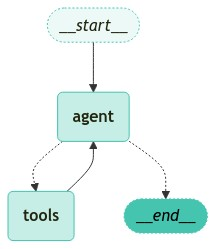

In [35]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(agent_executor)

## 출력 함수 정의

In [43]:
def stream_agent(instruction, agent_executor, config, print_tools=False):
    # 질문 입력
    inputs = {"messages": [("human", instruction)]}

    # 동기 스트림 처리(stream_mode="messages")
    # chunk_msg: 실시간 출력 메시지, metadata: 노드 정보
    for chunk_msg, metadata in agent_executor.stream(
        inputs, config, stream_mode="messages"
    ):
        if metadata["langgraph_node"] == "agent":
            if chunk_msg.content:
                print(chunk_msg.content, end="", flush=True)
        elif metadata["langgraph_node"] == "tools":
            if print_tools:
                print(chunk_msg.content)

In [44]:
# Config 설정
config = {"configurable": {"thread_id": "abc123"}}
stream_agent("안녕? 내 이름은 테디야", agent_executor, config)

안녕하세요, 테디! 다시 만나서 반가워요. 무엇을 도와드릴까요?

In [42]:
config = {"configurable": {"thread_id": "abc123"}}
stream_agent("내이름이 뭐라고?", agent_executor, config)

당신의 이름은 테디입니다. 맞나요?

In [ ]:
inputs = {
    "messages": [
        ("human", "teddynote langchain 과 teddynote 위키독스 검색해서 내용 종합해줘")
    ]
}

for chunk_msg, metadata in agent_executor.stream(
    inputs, config, stream_mode="messages"
):
    if hasattr(chunk_msg, "tool_calls"):
        if chunk_msg.tool_calls:
            tool_name = chunk_msg.tool_calls[0]["name"]
            # 도구 이름 출력
            print(tool_name)
    if hasattr(chunk_msg, "tool_call_chunks"):
        if chunk_msg.tool_call_chunks:
            # 도구 호출 Query 출력(토큰 단위 스트리밍)
            print(chunk_msg.tool_call_chunks[0]["args"], end="", flush=True)
    if metadata["langgraph_node"] == "tools":
        # 도구 호출 후 메시지 출력
        # print(chunk_msg.content)
        pass

    if metadata["langgraph_node"] == "agent":
        if chunk_msg.content:
            # 에이전트 출력 메시지 출력(토큰 단위 스트리밍)
            # print(chunk_msg.content, end="", flush=True)
            pass

In [ ]:
stream_agent("안녕? 내 이름은 테디야", agent_executor, config)

In [ ]:
stream_agent("내 이름이 뭐라고?", agent_executor, config)

In [47]:
instruction = """
다음의 내용을 순서대로 처리해줘.
1. 에이전트 관련된 최신 뉴스를 검색해줘
2. 에이전트 활용방법(LangChain) 에 대한 예제를 조사해줘
3. 최신 뉴스와 예제를 참고하여 보고서를 작성해줘
4. 작성한 보고서의 내용만 파일로 저장해줘 (파일 이름은 agent_report.md)
"""

In [48]:
# 함수 호출
stream_agent(instruction, agent_executor, config, print_tools=True)

에이전트
[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1PVGFsTjFPbEd0Tmp3ZzlSeUpMaUgxOGI0czNSU2NSb0ktcmhNcHBuN09JR3lmLWFKcXVEQzY4U3hOUjhDcGR4ZHd4MmhFRi1NbTZTMFlfSVpwdmNDY3hiWWd4ZjR3aXRIcEE?oc=5", "content": "오픈AI \"AI 에이전트 개발 핵심 과제는 추론과 도구사용 기능 향상\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTE5MNndvNjV6WEtWUERCQk1PcGVpdDdySm0tWWNJMGRtNXQ5ZzRzZTIwbHNlSGE4dHVJRlFQV2NlRXdyZUJxYnBZWExpeDZNUzZUcC1kcmdn?oc=5", "content": "구글, 에이전트 AI '자비스' 유출…컴퓨터 제어 기능으로 '주목' - ZD넷 코리아"}, {"url": "https://news.google.com/rss/articles/CBMiYkFVX3lxTE5xME5BQUZDWDVTejk0bTRxb1UyRmJhTkgzVTdYUmtLeHhyMVdpU1d2Z0Y4S1Z6dlg1VjUyYWtFTGhVbDZmOFVzRlBMOGdvbFJReVljRk1RczdFZVpfUzhxWUhB?oc=5", "content": "[일문일답] LGU+, 구글과 `홈 에이전트` 개발…\"AI 투자, 2028년까지 3조\" - 디지털데일리"}, {"url": "https://news.google.com/rss/articles/CBMicEFVX3lxTFBfRmxmZXl5bGZrTmt2Z0UxUXFKWlVwcjlwTEQtZXpfRVF1Mkx3UUxjNWFmV1NXM2R3emw2YzFraFljdnFVdGxTRk8zMG52My1acVdqQ2pfOUlaRzVaV2dWQTZHOVJVaVM0cV9xeFVvODbSAXRBVV95cUxQbk9CZHlBaUI4

In [49]:
instruction = """
data/SPRI_AI_Brief_2023년12월호_F.pdf 파일을 로드하고 목차를 출력해줘
"""

In [50]:
# 함수 호출
stream_agent(instruction, agent_executor, config)

목차는 다음과 같습니다:

---

## Ⅰ. 인공지능 산업 동향 브리프
1. 정책/법제
   - 미국, 안전하고 신뢰할 수 있는 AI 개발과 사용에 관한 행정명령 발표
   - G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의
   - 영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언
   - 미국 법원, 예술가들이 생성 AI 기업에 제기한 저작권 소송 기각
   - 미국 연방거래위원회, 저작권청에 소비자 보호와 경쟁 측면의 AI 의견서 제출
   - EU AI 법 3자 협상, 기반모델 규제 관련 견해차로 난항

2. 기업/산업
   - 미국 프런티어 모델 포럼, 1,000만 달러 규모의 AI 안전 기금 조성
   - 코히어, 데이터 투명성 확보를 위한 데이터 출처 탐색기 공개
   - 알리바바 클라우드, 최신 LLM ‘통이치엔원 2.0’ 공개
   - 삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개
   - 구글, 앤스로픽에 20억 달러 투자로 생성 AI 협력 강화
   - IDC, 2027년 AI 소프트웨어 매출 2,500억 달러 돌파 전망
   - 빌 게이츠, AI 에이전트로 인한 컴퓨터 사용의 패러다임 변화 전망
   - 유튜브, 2024년부터 AI 생성 콘텐츠 표시 의무화

3. 기술/연구
   - 영국 과학혁신기술부, AI 안전 연구소 설립 발표
   - 구글 딥마인드, 범용 AI 모델의 기능과 동작에 대한 분류 체계 발표
   - 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수

4. 인력/교육
   - 영국 옥스퍼드 인터넷 연구소, AI 기술자의 임금이 평균 21% 높아

## Ⅱ. 주요 행사
- CES 2024
- AIMLA 2024
- AAAI Conference on Artificial Intelligence

---

이 정보를 바탕으로 추가적인 질문이나 요청이 있으시면 말씀해 주세요!

In [51]:
instruction = """
이전의 작성한 목차를 참고하여 다음의 지시사항을 순서대로 처리하고, 목차를 작성해줘.

#지시사항
1. `에이전트` 키워드와 관련된 뉴스를 검색해줘
2. 1번의 내용을 바탕으로 이전에 작성한 "목차"의 형식에 맞게 목차를 작성해줘
3. 완성된 목차를 파일로 저장해줘 (파일 이름은 "agent_table_of_contents.md")

[IMPORTANT] 목차의 형식은 이전에 작성한 목차를 참고해줘
"""
# 함수 호출
stream_agent(instruction, agent_executor, config, print_tools=True)

에이전트
[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1PVGFsTjFPbEd0Tmp3ZzlSeUpMaUgxOGI0czNSU2NSb0ktcmhNcHBuN09JR3lmLWFKcXVEQzY4U3hOUjhDcGR4ZHd4MmhFRi1NbTZTMFlfSVpwdmNDY3hiWWd4ZjR3aXRIcEE?oc=5", "content": "오픈AI \"AI 에이전트 개발 핵심 과제는 추론과 도구사용 기능 향상\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiVkFVX3lxTE5MNndvNjV6WEtWUERCQk1PcGVpdDdySm0tWWNJMGRtNXQ5ZzRzZTIwbHNlSGE4dHVJRlFQV2NlRXdyZUJxYnBZWExpeDZNUzZUcC1kcmdn?oc=5", "content": "구글, 에이전트 AI '자비스' 유출…컴퓨터 제어 기능으로 '주목' - ZD넷 코리아"}, {"url": "https://news.google.com/rss/articles/CBMiYkFVX3lxTE5xME5BQUZDWDVTejk0bTRxb1UyRmJhTkgzVTdYUmtLeHhyMVdpU1d2Z0Y4S1Z6dlg1VjUyYWtFTGhVbDZmOFVzRlBMOGdvbFJReVljRk1RczdFZVpfUzhxWUhB?oc=5", "content": "[일문일답] LGU+, 구글과 `홈 에이전트` 개발…\"AI 투자, 2028년까지 3조\" - 디지털데일리"}, {"url": "https://news.google.com/rss/articles/CBMicEFVX3lxTFBfRmxmZXl5bGZrTmt2Z0UxUXFKWlVwcjlwTEQtZXpfRVF1Mkx3UUxjNWFmV1NXM2R3emw2YzFraFljdnFVdGxTRk8zMG52My1acVdqQ2pfOUlaRzVaV2dWQTZHOVJVaVM0cV9xeFVvODbSAXRBVV95cUxQbk9CZHlBaUI4